## A) Conduct simple data exploration and data analysis on the given dataset

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# 1) Display the number of attributes available in the dataset (exam_dataset.csv)?
df= pd.read_csv('exam_dataset.csv')
print(df.head())
print(df.columns)

   Age     BusinessTravel  MonthlyIncome  JobSatisfaction  Bonus  \
0   41      Travel_Rarely           5993                4  17979   
1   49  Travel_Frequently           5130                2  20520   
2   37      Travel_Rarely           2090                3   6270   
3   33  Travel_Frequently           2909                3   8727   
4   27      Travel_Rarely           3468                2  10404   

               Department  DistanceFromHome  Education EducationField  \
0                   Sales                 1          2  Life Sciences   
1  Research & Development                 8          1  Life Sciences   
2  Research & Development                 2          2          Other   
3  Research & Development                 3          4  Life Sciences   
4  Research & Development                 2          1        Medical   

   EmployeeCount  ...                JobRole  MaritalStatus PerformanceRating  \
0              1  ...        Sales Executive         Single            

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   BusinessTravel           1470 non-null   object
 2   MonthlyIncome            1470 non-null   int64 
 3   JobSatisfaction          1470 non-null   int64 
 4   Bonus                    1470 non-null   int64 
 5   Department               1470 non-null   object
 6   DistanceFromHome         1470 non-null   int64 
 7   Education                1470 non-null   int64 
 8   EducationField           1470 non-null   object
 9   EmployeeCount            1470 non-null   int64 
 10  EmployeeNumber           1470 non-null   int64 
 11  EnvironmentSatisfaction  1470 non-null   int64 
 12  Gender                   1470 non-null   object
 13  JobLevel                 1470 non-null   int64 
 14  JobRole                  1470 non-null  

In [4]:
# 2) Find the dimension number of this dataset
df.ndim

2

In [5]:
# 3) Display the average of these attributes: ‘Age’, ‘Bonus’ and ‘Years at Company’. 
# Be sure to round your answer to 4 decimal places
i=df.iloc[:,[0,4,20]]
print(round(np.mean(i),4))

Age                  36.9238
Bonus             20479.5014
YearsAtCompany        7.0082
dtype: float64


C:\Users\Acer\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [6]:
# 4) Find the minimum and maximum ‘Bonus’
print(df['Bonus'].max())
print(df['Bonus'].min())

79892
3027


In [73]:
# 5) What are the departments in this dataset?
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

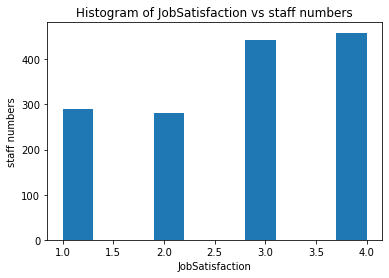

In [13]:
# 6) Provide graphical visualization by plotting Histogram of ‘JobSatisfaction’ vs staff numbers’
plt.hist(x=df['JobSatisfaction']) 
plt.title("Histogram of JobSatisfaction vs staff numbers")
plt.xlabel("JobSatisfaction")
plt.ylabel("staff numbers")
plt.show() 

                    Bonus  JobSatisfaction
Bonus            1.000000        -0.003652
JobSatisfaction -0.003652         1.000000


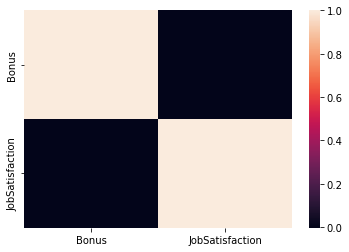

In [14]:
# 7) Find the correlation between ‘Bonus’ and ‘JobSatisfaction’
corr2 = df.iloc[:,[4,3]].corr()
print(corr2)

sns.heatmap(corr2,
            xticklabels=corr2.columns.values,
            yticklabels=corr2.columns.values)
plt.show()

### 8) Based on your findings, discuss briefly(you can either use comments/markdown to write your answer) on:  
a) Range of bonus at Company A  
3027-79892  

b) Most and Least Frequent JobSatisfaction at Company A     
Most Frequent JobSatisfaction = 4  
Least Frequent JobSatisfaction = 2    

c) Discuss your observation on the distribution of JobSatisfaction values  
the distribution of JobSatisfaction is not normal distribution. It skewed to the left. 

d) Is there a linear relationship between bonus and JobSatisfaction at the company?  
No linear relationship between bonus and JobSatisfaction.  
Bonus vs JobSatisfaction=-0.003652. weak correlated. thus no linear relationship.   


## B) Classification using Random Forest for: ‘Age’, ‘BusinessTravel’, ‘MonthlyIncome’ and ‘JobSatisfaction’ to predict ‘Attrition’. Sample steps are as below:

In [18]:
# 1) Import necessary libraries
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [20]:
# 2) Import dataset (exam_dataset.csv)
df2= pd.read_csv('exam_dataset.csv')
df2.head()

,Age,BusinessTravel,MonthlyIncome,JobSatisfaction,Bonus,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,JobRole,MaritalStatus,PerformanceRating,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,OverTime,Attrition
0,41,Travel_Rarely,5993,4,17979,Sales,1,2,Life Sciences,1,...,Sales Executive,Single,3,0,0,1,6,0,Yes,Yes
1,49,Travel_Frequently,5130,2,20520,Research & Development,8,1,Life Sciences,1,...,Research Scientist,Married,4,1,3,3,10,1,No,No
2,37,Travel_Rarely,2090,3,6270,Research & Development,2,2,Other,1,...,Laboratory Technician,Single,3,0,3,3,0,0,Yes,Yes
3,33,Travel_Frequently,2909,3,8727,Research & Development,3,4,Life Sciences,1,...,Research Scientist,Married,3,0,3,3,8,3,Yes,No
4,27,Travel_Rarely,3468,2,10404,Research & Development,2,1,Medical,1,...,Laboratory Technician,Married,3,1,3,3,2,2,No,No


In [74]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   BusinessTravel           1470 non-null   object
 2   MonthlyIncome            1470 non-null   int64 
 3   JobSatisfaction          1470 non-null   int64 
 4   Bonus                    1470 non-null   int64 
 5   Department               1470 non-null   object
 6   DistanceFromHome         1470 non-null   int64 
 7   Education                1470 non-null   int64 
 8   EducationField           1470 non-null   object
 9   EmployeeCount            1470 non-null   int64 
 10  EmployeeNumber           1470 non-null   int64 
 11  EnvironmentSatisfaction  1470 non-null   int64 
 12  Gender                   1470 non-null   object
 13  JobLevel                 1470 non-null   int64 
 14  JobRole                  1470 non-null  

In [21]:
# 3) Allocate the relevant attributes as input and output
x=df2.iloc[:,[0,1,2,3]].values 
y=df2.iloc[:,23].values

In [22]:
# 4) Use LabelEncoder to encode categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
x[:,1] = labelencoder_X.fit_transform(x[:,1])
x

array([[41, 2, 5993, 4],
       [49, 1, 5130, 2],
       [37, 2, 2090, 3],
       ...,
       [27, 2, 6142, 2],
       [49, 1, 5390, 2],
       [34, 2, 4404, 3]], dtype=object)

In [23]:
# 5) Split your data into training and test sets with the appropriate proportions
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [24]:
# 6) Normalized your data using StandardScaler
#import scaler
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)

In [75]:
# 7) Fit the and predict results using the Classifier
# 7) Fit using the Classifier
from sklearn.ensemble import RandomForestClassifier 
classifier= RandomForestClassifier(n_estimators=50,criterion='entropy',random_state=0) 
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=0)

In [76]:
# 7) predict results using the Classifier
x_test = sc_X.transform(x_test)
y_pred=classifier.predict(x_test)
print(y_pred) # predicted
print(y_test) # actual

['Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Y

In [77]:
# 8) Evaluate your results using confusion matrix and calculate the prediction accuracy
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

# Finding accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

[[  0 310]
 [  0  58]]
0.15760869565217392


9) Discuss your results and findings     
accuracy score = 0.15760869565217392 which is too far from the value of 1. It can be concluded that random forest cannot  
do classification very well with standard scaler. Random forest is tree based algorithm that dont need scaling.

##  Section C Tasks
#### C)Clustering comparison between K-Means and DBSCAN

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [57]:
import warnings
warnings.filterwarnings("ignore")

In [58]:
dataset = pd.read_csv('clustering.csv')

In [59]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  300 non-null    int64  
 1   A           300 non-null    float64
 2   B           300 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 7.2 KB


In [60]:
X = dataset.iloc[:,[1,2]].values

In [69]:
# StandardScaler
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [ ]:
# 1) Perform K-Means clustering (use WCSS to help find best K value) on the given dataset, 
# display clustering results with graphical visualization, provide any necessary comments and discussions.

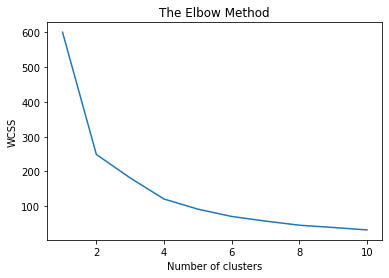

In [70]:
# Finding the number of clusters using the Elbow Method:
from sklearn.cluster import KMeans
wcss = [] # wcss start with empty list
for i in range(1,11): # i:cluster no(1-10)
    kmeans=KMeans(n_clusters=i,init='k-means++', random_state=42) # 'k-means++:increase speed
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_) # inertia_:wcss value pada i
plt.plot(range(1,11),wcss) # x:range(1,11), y:wcss
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Text(0, 0.5, 'Feature 1')

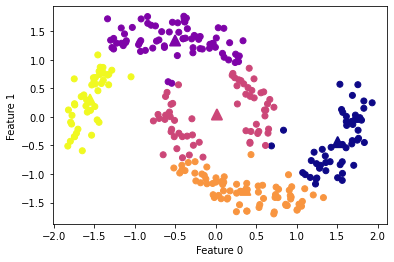

In [71]:
#KMeans Clustering:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans= KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(X_scaled)
y_pred= kmeans.predict(X_scaled)

#plot the cluster assignments and cluster centers
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, cmap='plasma')
plt.scatter(kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    marker='^',
    c= [0,1,2,3,4],
    s= 100,
    linewidth= 2,
    cmap= 'plasma')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1') 

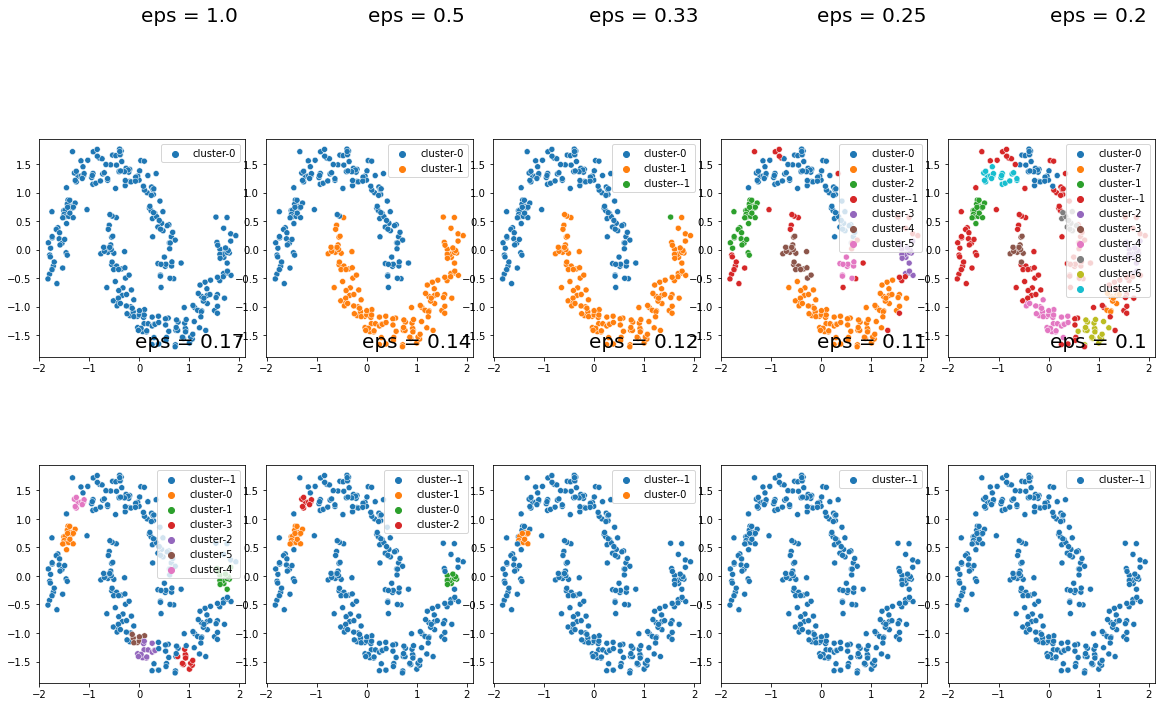

In [49]:
# 2) Perform DBSCAN clustering (use knee locator to help find optimal parameter) on the
# given dataset, display clustering results with graphical visualization, provide any necessary comments and discussions.

#DBSCAN Clustering

fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(hspace=.5, wspace=.1)
i = 1
for x in range(10, 0, -1): # value:10-1
    eps = 1/(11-x) # 1/(11-10=1)=1
    db = DBSCAN(eps=eps, min_samples=10).fit(X_scaled)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    clusters = db.labels_
    ax = fig.add_subplot(2, 5, i)
    ax.text(1, 4, "eps = {}".format(round(eps, 2)), fontsize=20,    ha="center")
    sns.scatterplot(X_scaled[:,0], X_scaled[:,1], hue=["cluster-{}".format(x) for x in clusters])
    i += 1

Text(0, 0.5, 'Distance')

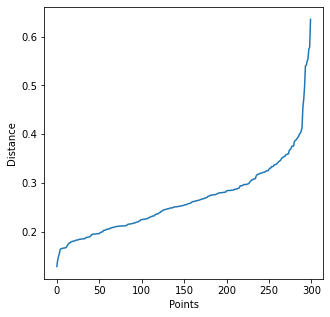

In [51]:
# Knee Locator

from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(X_scaled)
distances, indices = neighbors.kneighbors(X_scaled)

distances = np.sort(distances[:,10], axis=0)
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex',
direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5)) 
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

0.34567786876134754


<Figure size 360x360 with 0 Axes>

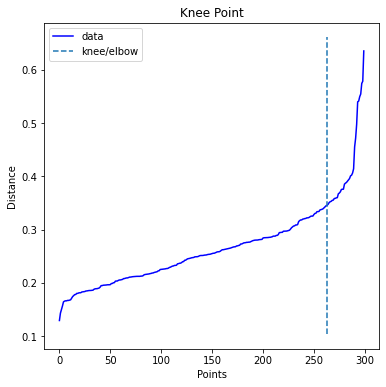

In [52]:
# Optimum Knee
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
plt.savefig("knee.png", dpi=300)
print(distances[knee.knee])

<AxesSubplot:>

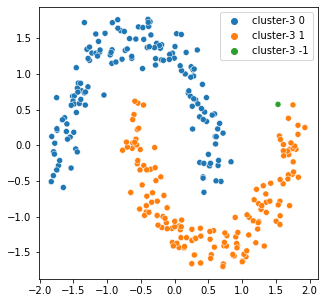

In [53]:
# with optimum eps
db = DBSCAN(eps=distances[knee.knee],
min_samples=10).fit(X_scaled) # reduce 10 ke bawah klu nak a bit loser
labels = db.labels_

fig = plt.figure(figsize=(5, 5))
sns.scatterplot(X_scaled[:,0], X_scaled[:,1], hue=["cluster-3 {}".format(x) for x in labels])

In [ ]:
# 3) Conduct comparison studies on the two techniques (K-Means and DBSCAN), with
# graphical visualization comparisons, discuss your results and decide on whether:

# a. K-Means is the better clustering technique for this dataset or,
# b. DBSCAN is the better clustering technique for this dataset, or
# c. There’s no clear distinction between the two techniques for this dataset

# Based on the above graph , it can be concluded that DBSCAN is the better clustering technique for this dataset